# AskReddit Troll Question Detection Challenge
TEAM NAME - Gduo_UltraProMax<br>
Ayush Das IMT2019014<br>
Balkaran Singh IMT2019016<br>


#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Upload Train and Test data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df = pd.concat([train_df, test_df])

In [ ]:
train_df.head

<bound method NDFrame.head of                          qid  ... target
0       a3dee568776c08512c89  ...      0
1       bdb84f519e7b46e7b7bb  ...      0
2       29c88db470e2eb5c97ad  ...      0
3       3387d99bf2c3227ae8f1  ...      0
4       e79fa5038f765d0f2e7e  ...      0
...                      ...  ...    ...
653056  ad9e82029956889e014e  ...      0
653057  a4619bd556d65bf5e52e  ...      0
653058  2573a7df05fc8e071aa2  ...      0
653059  20e4aeb3ffe5f637ab99  ...      0
653060  7e29d8a1f6696b46a52a  ...      0

[653061 rows x 3 columns]>

#Data Visualization

##Plots

##Count of 0's and 1's

0    612656
1     40405
Name: target, dtype: int64


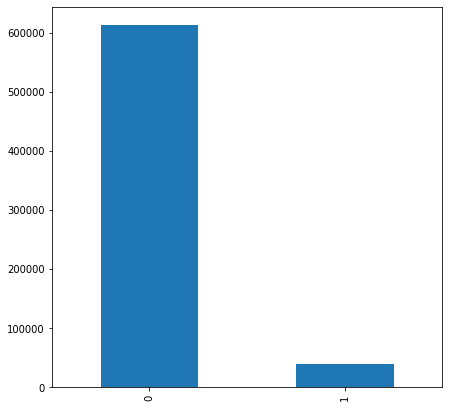

In [ ]:
plt.subplots(figsize = (7, 7))
count_target = train_df['target'].value_counts()
print(count_target)
count_target.plot.bar()


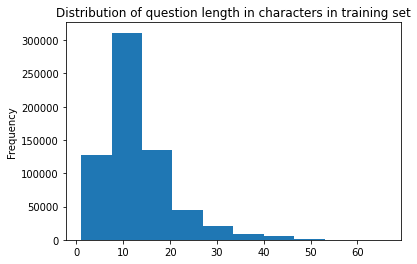

In [ ]:
plt.yscale('linear');
plt.title('Distribution of question length in characters in training set')
train_df['question_text'].apply(lambda y: len(y.split())).plot(kind = 'hist');

In [ ]:
train_df.shape

(653061, 3)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
corpus=[]
new= train_df['question_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

##Top Stopwords Barchart

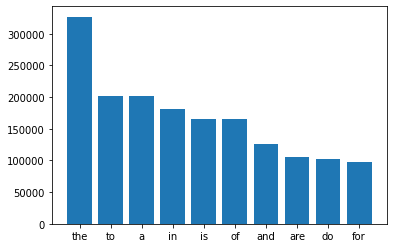

In [ ]:
plot_top_stopwords_barchart(train_df['question_text'])

In [ ]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

##Word length frequency graph

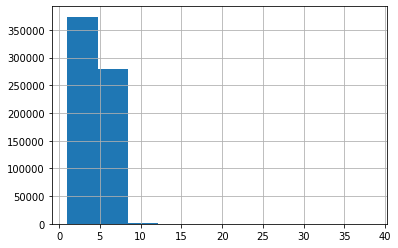

In [ ]:
plot_word_length_histogram(train_df['question_text'])

NameError: ignored

##Top Non Stopwords

In [ ]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

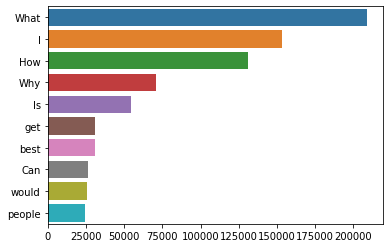

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

##

## Topic Modeling in Python: Latent Dirichlet Allocation (LDA)

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 5.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=b17a7e9b71bcd0f568351500bd78d31e9a99490d7a65b6a4993339174efd3f70
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:

import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(train_df['question_text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
lda_model.show_topics()

[(0,
  '0.066*"What" + 0.034*"How" + 0.026*"best" + 0.013*"Which" + 0.008*"Where" + 0.008*"way" + 0.007*"good" + 0.007*"use" + 0.006*"company" + 0.006*"India"'),
 (1,
  '0.036*"What" + 0.033*"How" + 0.024*"get" + 0.012*"Can" + 0.010*"job" + 0.008*"Which" + 0.008*"student" + 0.008*"year" + 0.007*"good" + 0.007*"college"'),
 (2,
  '0.097*"What" + 0.023*"How" + 0.009*"would" + 0.007*"mean" + 0.005*"difference" + 0.005*"Can" + 0.004*"Who" + 0.004*"The" + 0.004*"cause" + 0.004*"happen"'),
 (3,
  '0.044*"Why" + 0.020*"How" + 0.017*"people" + 0.014*"n\'t" + 0.010*"like" + 0.008*"think" + 0.007*"would" + 0.006*"get" + 0.006*"someone" + 0.005*"life"')]

In [ ]:

plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.316509 -0.007387       1        1  33.451492
0      0.126619 -0.022057       2        1  24.243443
2      0.099642 -0.234456       3        1  21.815513
1      0.090248  0.263900       4        1  20.489552, topic_info=        Term           Freq          Total Category  logprob  loglift
2       What  209716.000000  209716.000000  Default  30.0000  30.0000
18       Why   68975.000000   68975.000000  Default  29.0000  29.0000
132     best   29938.000000   29938.000000  Default  28.0000  28.0000
10       get   31751.000000   31751.000000  Default  27.0000  27.0000
312   people   26503.000000   26503.000000  Default  26.0000  26.0000
..       ...            ...            ...      ...      ...      ...
814     many    3724.996401   11559.462307   Topic4  -5.5572   0.4528
186     work    3489.656687   10033.742357   Topic4  -5.6224   0.5291
780  getting    2946.832492    4659.450342   Topic4  -5.7915   1.1271
348     much    3001.334699   10545.769181   Topic4  -5.7732   0.3286
127     time    2989.430978   12813.604578   Topic4  -5.7772   0.1298

[225 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
642       4  0.999824   2017
4         4  0.999840   2018
286       1  0.591360    Are
286       2  0.176708    Are
286       3  0.102779    Are
...     ...       ...    ...
79        2  0.162514  would
79        3  0.366859  would
79        4  0.031184  would
214       1  0.426660   year
214       4  0.573312   year

[252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [ ]:
test_df.shape

(653061, 2)

##Polarity of Questions and Polarity Plot

In [ ]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

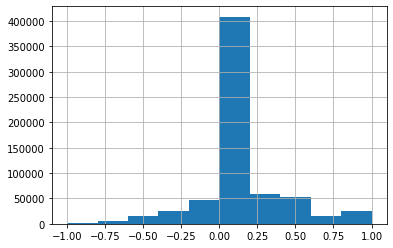

In [ ]:
plot_polarity_histogram(train_df['question_text'])

# Data Preprocessing and Cleaning

## Train and Test dataset before Preprocessing

In [3]:
test_df


,qid,question_text
0,0a824224322f0a36025f,Why is my fish tank so cloudy?
1,28af14c4e4777ce1273e,Are AAP supporters/leaders hypocrites?
2,6892a52c51103dd95044,Can you still get a ticket if you shut off you...
3,badd9e8886d73fc1fe4e,Why should any liberal or caring person want t...
4,4ef178f82a465e4804ae,How can I know who got into my PC using anydesk?
...,...,...
653056,c2a1f06f34b81ebf46b0,Can we directly apply for Facebook market spec...
653057,1062e8840a6d64d3d638,What we do to remind physics concept?
653058,785bc805f28073e7f4a3,Is rooting Lenovo A269i safe?
653059,a0c5dfc967b11c7b3d5b,What is the longest river of India?


In [4]:
train_df

,qid,question_text,target
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0
...,...,...,...
653056,ad9e82029956889e014e,Which coaching centre is best in Delhi for IAS...,0
653057,a4619bd556d65bf5e52e,Is their any API to check CIBIL score and down...,0
653058,2573a7df05fc8e071aa2,"In paranormal shows, why do spirits talk to me...",0
653059,20e4aeb3ffe5f637ab99,How does Josh Gordon have such well developed ...,0


##Clean Text Function: Remove Stopwords and apply Stemming

**Clean text Funtion** : Takes text as input. Removes extra characters, Stopwords and applies Stemming

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download(['punkt', 'stopwords'])
ss = nltk.SnowballStemmer("english")
stopword = nltk.corpus.stopwords.words('english')

def clean_text(text):
    clean_text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$',' ',text)
    #remove webaddress,moneysymbols,phone_numbers
    clean_text = re.sub(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',' ',text)
    clean_text = re.sub(r'£|\$',' ',text)
    clean_text = re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',' ',text)
    clean_text = re.sub(r'\d+(\.\d+)?',' ',text)
    #remove punctuation
    clean_text = re.sub(r'[^\w\d\s]',' ',text)
    # remove special characters
    clean_text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    clean_text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    clean_text = ' '.join( word.lower() for word in word_tokenize(text)if word.isalpha() and word not in stopword)
    clean_text = ' '.join(ss.stem(term) for term in text.split())
    
    return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##DownSampling

Our dataset is imbalanced. The number of ones  is very less as compared to number of zeroes. We use downsampling to balance the dataset 

##Plot of 0's and 1's before Downsampling

(40405, 3) (612656, 3)


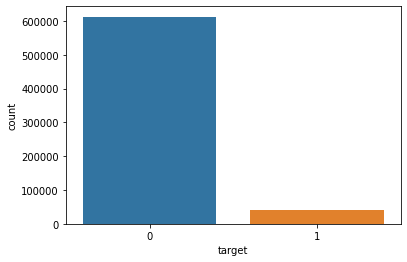

In [ ]:
print(train_df[train_df.target == 1].shape, train_df[train_df.target == 0].shape)
sns.countplot(x='target', data=train_df)

In [ ]:
 print( "No of 1's: ", train_df[train_df.target == 1].shape[0])
 print( "No of 0's: ", train_df[train_df.target == 0].shape[0])

No of 1's:  40405
No of 0's:  612656


##DownSampling Code

In [6]:
#Resampling the dataset
from sklearn.utils import resample
zero_data = train_df[train_df["target"] == 0]
one_data = train_df[train_df["target"] == 1]
train_df = pd.concat([resample(zero_data, replace = True, n_samples = len(one_data)*6), one_data])

##Plot of 0's and 1's after Downsampling

(40405, 3) (242430, 3)


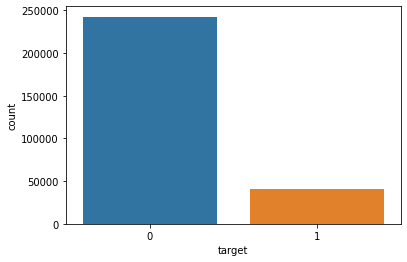

In [ ]:
print(train_df[train_df.target == 1].shape, train_df[train_df.target == 0].shape)
sns.countplot(x='target', data=train_df)

In [ ]:
 print( "No of 1's: ", train_df[train_df.target == 1].shape[0])
 print( "No of 0's: ", train_df[train_df.target == 0].shape[0])

No of 1's:  40405
No of 0's:  242430


##NLP Text Preprocessing:Text Vectorization

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(preprocessor=clean_text, ngram_range=(1, 4))

In [9]:
X = vectorizer.fit_transform(train_df['question_text'])
x = vectorizer.transform(test_df['question_text'])

In [10]:
X_copy = X
x_copy = x

In [11]:
y = train_df['target']
y_copy = train_df['target']

#Models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

##Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##F1 Score function

In [ ]:

def get_f1(model, name):
 y_pred = model.predict(X_test)
 print('{} model with F1 score = {}'.format(name, f1_score(y_test, y_pred,average='micro')))




##Logistic Regression

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [ ]:
from sklearn import model_selection, metrics, linear_model

logistic = linear_model.LogisticRegression(solver='saga', max_iter = 5000,class_weight='balanced')
logistic.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=5000, solver='saga')

##F1 Score : Logistic Regression

In [ ]:
get_f1(logistic,'LogisticRegression')

LogisticRegression model with F1 score = 0.9357575971856382


##XGBoost

In [ ]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)

XGBClassifier()

##F1 Score:XGBoost

In [ ]:
get_f1(xgb_cl,'XGboost')

XGboost model with F1 score = 0.8931355737444092


##STACKING:Ensemble Learning

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [ ]:
X, y = load_iris(return_X_y=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
            ]
stack_clf = StackingClassifier(
      estimators=estimators, final_estimator=LogisticRegression(solver='saga', max_iter = 5000,class_weight='balanced')
)

In [ ]:
stack_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      max_iter=5000,
                                                      solver='saga'))

##F1 Score:Stacking

In [ ]:
get_f1(stack_clf,'stacking')

stacking model with F1 score = 0.9473684210526315


#Submission

In [12]:
from sklearn import model_selection, metrics, linear_model
logi = linear_model.LogisticRegression(solver='saga', max_iter = 5000,class_weight='balanced')


In [13]:
logi.fit(X_copy,y_copy)

LogisticRegression(class_weight='balanced', max_iter=5000, solver='saga')

In [15]:
test_preds = logi.predict(x_copy)

In [16]:
submission_df = test_df.loc[:, ('qid',)]
submission_df['target'] = pd.Series(test_preds)

In [17]:
submission_df.head

<bound method NDFrame.head of                          qid  target
0       0a824224322f0a36025f       0
1       28af14c4e4777ce1273e       1
2       6892a52c51103dd95044       0
3       badd9e8886d73fc1fe4e       1
4       4ef178f82a465e4804ae       0
...                      ...     ...
653056  c2a1f06f34b81ebf46b0       0
653057  1062e8840a6d64d3d638       0
653058  785bc805f28073e7f4a3       0
653059  a0c5dfc967b11c7b3d5b       0
653060  c8f7b7999cf971f549a5       0

[653061 rows x 2 columns]>

In [18]:
submission_df.describe()

,target
count,653061.000000
mean,0.092171
std,0.289267
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
submission_df.to_csv('sub2.csv', index=False)